Importing libraries

In [1]:
import math
import random
import matplotlib.pyplot as plt
import numpy as np

Importing classes

In [2]:
#CMAB
from Strategies.RLinUCB                    import RLinUCB
from Strategies.RLinUCBGlobal              import RLinUCBGlobal
from Strategies.RCLinUCB                   import RCLinUCB
from Strategies.RCLinUCBProduct             import RCLinUCBProduct
#Rewards
from codigo.Strategies.Rewards.MovieFeature import MovieFeature

Init Parameters

In [3]:
#834596
iterations = 10000
experimentos = 1

d = 25
alpha = 1
lamb = 1

sup_percentile = 75
inf_percentile = 25

Init

In [4]:
import pickle

with open('../datos/movielens/articles_movie.pkl', 'rb') as fp:
    articles = list(pickle.load(fp).values())

In [5]:
user_amount = 117

k = len(articles)
clusters_amounts = [1,2,4,8,16]

reward_class1 = MovieFeature(articles)
reward_class2 = MovieFeature(articles)
reward_class3 = MovieFeature(articles)

In [6]:
# Run experiments
linucb_regrets              = np.zeros((experimentos,iterations))
linucb_g_regrets              = np.zeros((experimentos,iterations))
linucb_cluster_regrets       = np.zeros((experimentos,iterations))
# Run experiments
for i in    range(experimentos):
    alpha = 0.4 #+ 0.1*random.random() #* 0.5 + 0.1
    lamb = 0.1 #+ 0.1*random.random() #* 0.5 + 0.1

    print('exp: ' + str(i + 1) + '/' + str(experimentos))
    reward_class1.reset()
    reward_class2.reset()
    reward_class3.reset()

    linucbk       = RCLinUCB(k, iterations, reward_class1, d, user_amount, alpha, clusters_amounts, lamb, 1000, 500 )
    linucb       =  RLinUCB(k, iterations, reward_class2, d, user_amount, alpha, lamb )
    linucbg       = RLinUCBGlobal(k, iterations, reward_class3, d, user_amount, alpha, lamb )

    linucb_cluster_regrets[i]          = linucbk.run()
    linucb_regrets[i]                  = linucb.run()
    linucb_g_regrets[i]                = linucbg.run()


exp: 1/1
0/10000
1000/10000
2000/10000
3000/10000
4000/10000
5000/10000
6000/10000
7000/10000
8000/10000
9000/10000
0/10000


C:\Users\SG0316530\Workspace\PythonProjects\CMAB\codigo\Strategies\RLinUCB.py:42: RuntimeWarning: overflow encountered in multiply
  self.theta[:, :, user_id] = theta + k_n * e_n


1000/10000
2000/10000
3000/10000
4000/10000
5000/10000
6000/10000
7000/10000
8000/10000
9000/10000
0/10000
1000/10000
2000/10000
3000/10000
4000/10000
5000/10000
6000/10000
7000/10000
8000/10000
9000/10000


In [12]:
random = 1/25
#linucb
linucb_inf            = np.percentile(linucb_regrets,inf_percentile ,axis=0) / random
linucb_median_rew     = np.median(linucb_regrets,axis=0) / random
linucb_sup            = np.percentile(linucb_regrets,sup_percentile ,axis=0) / random

linucb_g_inf            = np.percentile(linucb_g_regrets,inf_percentile ,axis=0) / random
linucb_g_median_rew     = np.median(linucb_g_regrets,axis=0) / random
linucb_g_sup            = np.percentile(linucb_g_regrets,sup_percentile ,axis=0) / random

linucb_c_inf            = np.percentile(linucb_cluster_regrets,inf_percentile ,axis=0) / random
linucb_c_median_rew     = np.median(linucb_cluster_regrets,axis=0) / random
linucb_c_sup            = np.percentile(linucb_cluster_regrets,sup_percentile ,axis=0)  / random


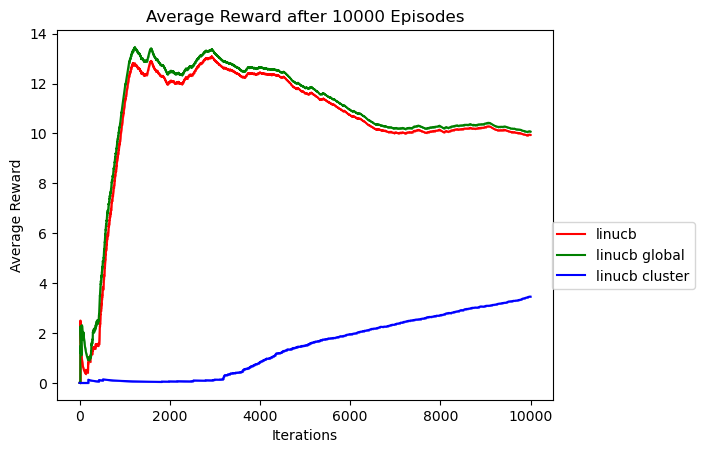

In [13]:
fig, ax = plt.subplots()

transparencia = 0.5

#linucb
plt.plot(linucb_median_rew,label="linucb", color='red')
ax.fill_between(range(len(linucb_median_rew)),linucb_sup,linucb_inf, color = 'red', alpha = transparencia)

plt.plot(linucb_g_median_rew,label="linucb global", color='green')
ax.fill_between(range(len(linucb_g_median_rew)),linucb_g_sup,linucb_g_inf, color = 'green', alpha = transparencia)

plt.plot(linucb_c_median_rew,label="linucb cluster", color='blue')
ax.fill_between(range(len(linucb_c_median_rew)),linucb_c_sup,linucb_c_inf, color = 'blue', alpha = transparencia)

plt.legend(bbox_to_anchor=(1.3, 0.5))
plt.xlabel("Iterations")
plt.ylabel("Average Reward")
plt.title("Average Reward after " + str(iterations)
    + " Episodes")
#plt.ylim(0,0.1)
plt.show()


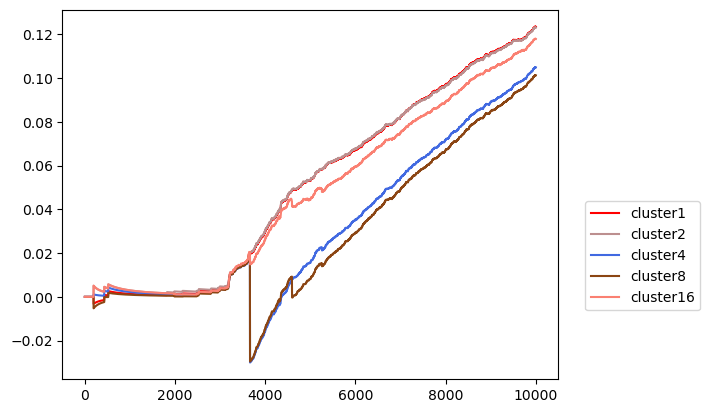

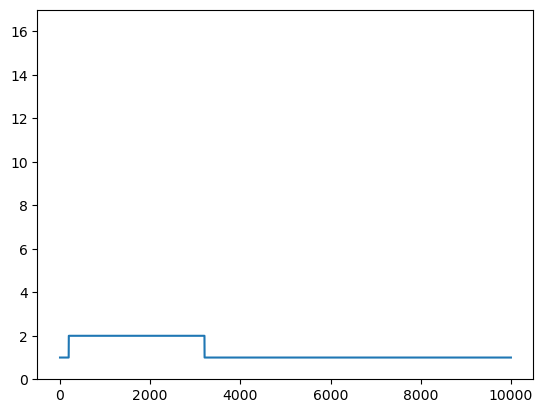

In [9]:
linucbk.get_rc().graph()

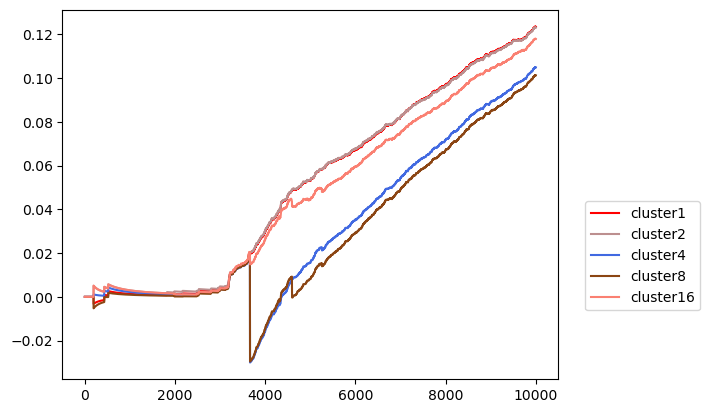

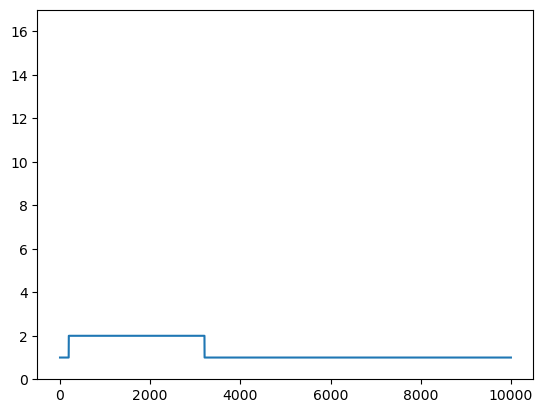

In [10]:
linucbk.get_rc().graph()

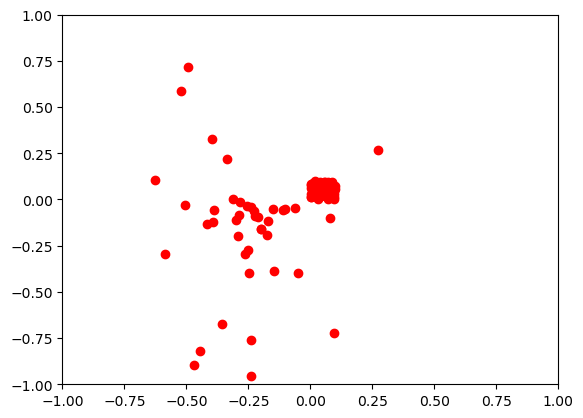

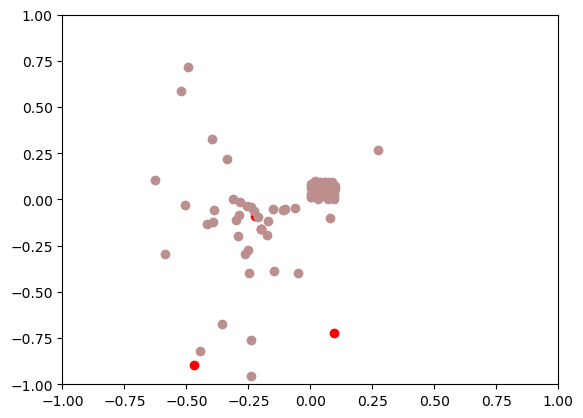

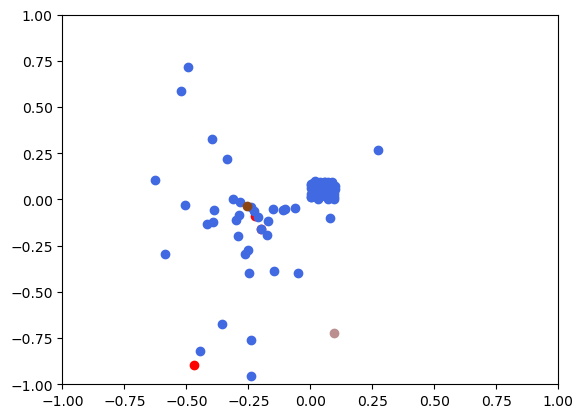

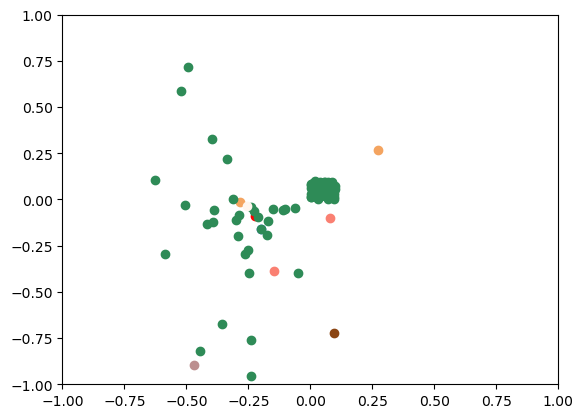

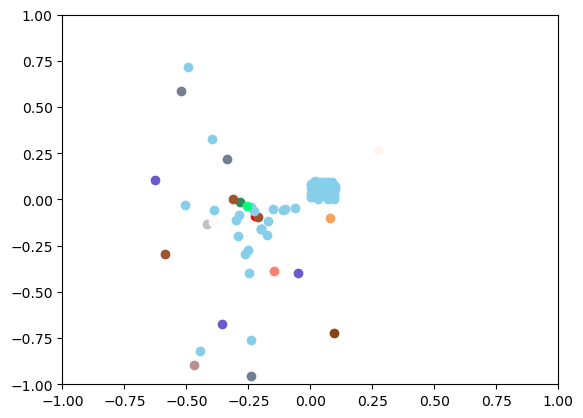

In [11]:
linucbk.get_model().graph()